# **Concepts:** TF-IDF with SVD


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving list.csv to list.csv
User uploaded file "list.csv" with length 15722 bytes


In [21]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn import preprocessing

from sklearn.cluster import KMeans

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline


#from sklearn.metrics import accuracy_score, classification_report

# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)




In [3]:
# Load the dataset
df = pd.read_csv("list.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head(25)



,newsgroup,document_id
0,talk.religion.misc,82757
1,talk.religion.misc,82758
2,talk.religion.misc,82759
3,talk.religion.misc,82760
4,talk.religion.misc,82763
5,talk.religion.misc,82766
6,talk.religion.misc,82767
7,talk.religion.misc,82771
8,talk.religion.misc,82772
9,talk.religion.misc,82774


In [4]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()


Total Rows: 628
Total Columns: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   newsgroup    628 non-null    object
 1   document_id  628 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.9+ KB


,document_id
count,628.000000
mean,83918.148089
std,439.727869
min,82757.000000
25%,83649.000000
50%,84047.500000
75%,84248.250000
max,84570.000000


In [5]:
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
newsgroup,0
document_id,0


Apply TF-IDF → SVD → Visualize top 2 components<br>
<br>
Optional: After performing TF-IDF on the given dataset, try to apply clustering with 20 clusters to see if the data forms a group roughly identical to the original groups.


In [38]:
# TF-IDF
data = fetch_20newsgroups(subset='all')
x = data.data
y = data.target
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = vectorizer.fit_transform(x)


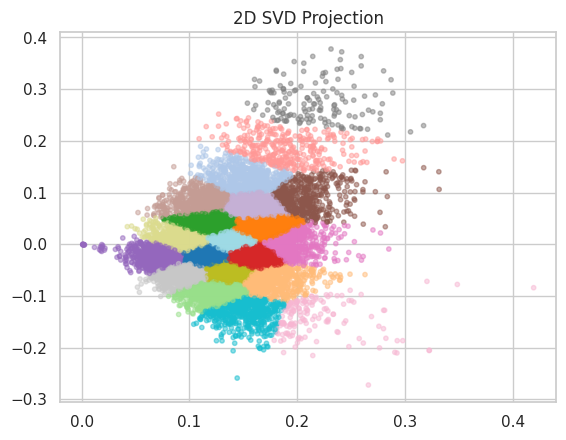

In [40]:
# SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
#print(" Output Shape:", X_svd.shape)

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', alpha=0.5, s=10)
plt.title("2D SVD Projection")
plt.show()


In [32]:
# Optional Clustering
kmeans = KMeans(n_clusters=20)
labels = kmeans.fit_predict(X_svd)
print("Silhouette Score:", silhouette_score(X_svd, labels))

Silhouette Score: 0.31776159606680715


- We use dimensionality reduction to shrink the data down to just a few important parts, thus makes it easier to analyse.<br>
- SVD/PCA helps reduce the number of features (words) while keeping the most important information.
- Clustering groups similar documents together, even if we don’t know their labels.
